In [1]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('df_xdata.csv', sep=";")

In [3]:
data.head()

,Timestamp,610FI001.DACA.PV,610FI005.DACA.PV,610FI015.DACA.PV,610FI017A.PV,610FI017B.PV,610FI017C.PV,610FI020.PV,610FI023A.PV,610FI023B.PV,...,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Param8,Param9,Param10
0,2018-09-28 20:00:00,6767.059487,3915.980352,6488.320318,7378.070513,7401.434551,7368.363223,235425.40625,37094.747564,41896.374375,...,102.480702,999.576371,1002.109174,11.380535,10.892793,77.732925,0.0,51.094552,48.905448,0.0
1,2018-09-29 08:00:00,6765.877464,1327.084508,6491.123816,7378.806800,7398.244902,7363.662715,235425.40625,36857.208869,42294.850312,...,102.480702,999.576371,1002.109174,11.380908,10.889553,77.736564,0.0,51.094552,48.905448,0.0
2,2018-09-29 20:15:00,6770.346529,6255.144424,6486.659397,7379.145501,7398.580645,7364.334297,235425.40625,37815.427267,42395.268750,...,102.480702,999.576371,1002.109174,11.377843,10.888383,77.734026,0.0,51.094552,48.905448,0.0
3,2018-09-30 08:00:00,6775.414762,274.236670,6501.651024,7378.688996,7426.280020,7392.369297,235425.40625,37709.016759,43039.450156,...,102.480702,999.576371,1002.109174,11.378230,10.891634,77.726824,0.0,51.094552,48.905448,0.0
4,2018-09-30 20:00:00,6775.592058,2045.991153,6516.385240,7377.996880,7382.128965,7347.546758,235425.40625,38053.489369,42279.893906,...,102.480702,999.576371,1002.109174,11.380795,10.888861,77.726054,0.0,51.094552,48.905448,0.0


In [4]:
# столбцы с номерами: [Павло]ва Дарья
# П - 17
# A - 1
# В - 3
# Л - 13
# О - 16
N1 = 17
N2 = 1
N3 = 3
N4 = 13
N5 = 16
cols = [N1, N2, N3, N4, N5]

In [5]:
mydata = data.iloc[:, cols]
mydata

,610FI024D.DACA.PV,610FI001.DACA.PV,610FI015.DACA.PV,610FI023F.PV,610FI024C.DACA.PV
0,0.0,6767.059487,6488.320318,41829.071875,0.0
1,0.0,6765.877464,6491.123816,41837.618594,0.0
2,0.0,6770.346529,6486.659397,41681.648906,0.0
3,0.0,6775.414762,6501.651024,41786.340625,0.0
4,0.0,6775.592058,6516.385240,41770.316406,0.0
...,...,...,...,...,...
1138,0.0,1445.563311,6554.947347,28072.110000,0.0
1139,0.0,1650.849672,6552.562327,28072.110000,0.0
1140,0.0,1710.731738,6555.505265,28072.110000,0.0
1141,0.0,1688.029410,6434.294653,28072.110000,0.0


In [6]:
mydata.describe()

,610FI024D.DACA.PV,610FI001.DACA.PV,610FI015.DACA.PV,610FI023F.PV,610FI024C.DACA.PV
count,1143.0,1143.000000,1143.000000,1143.000000,1143.0
mean,0.0,4477.939628,6424.570211,39374.282547,0.0
std,0.0,1960.839427,269.248257,5287.573619,0.0
min,0.0,920.870000,5631.728204,27716.902000,0.0
25%,0.0,2519.834311,6271.966265,37348.645800,0.0
50%,0.0,4848.112508,6386.927347,39719.192400,0.0
75%,0.0,6264.098770,6604.118571,43265.929600,0.0
max,0.0,7041.030393,7191.521633,48950.859600,0.0


In [7]:
mydata.corr()

,610FI024D.DACA.PV,610FI001.DACA.PV,610FI015.DACA.PV,610FI023F.PV,610FI024C.DACA.PV
610FI024D.DACA.PV,NaN,NaN,NaN,NaN,NaN
610FI001.DACA.PV,NaN,1.000000,0.330132,0.588900,NaN
610FI015.DACA.PV,NaN,0.330132,1.000000,0.238881,NaN
610FI023F.PV,NaN,0.588900,0.238881,1.000000,NaN
610FI024C.DACA.PV,NaN,NaN,NaN,NaN,NaN


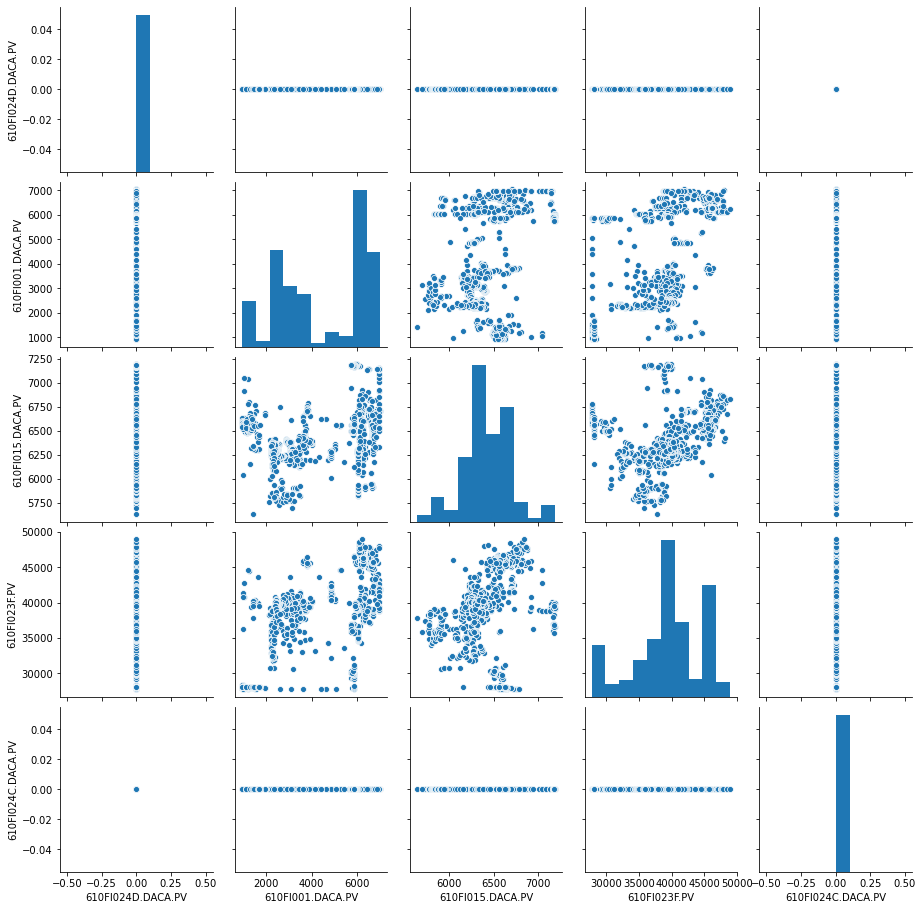

In [8]:
sns.pairplot(mydata)

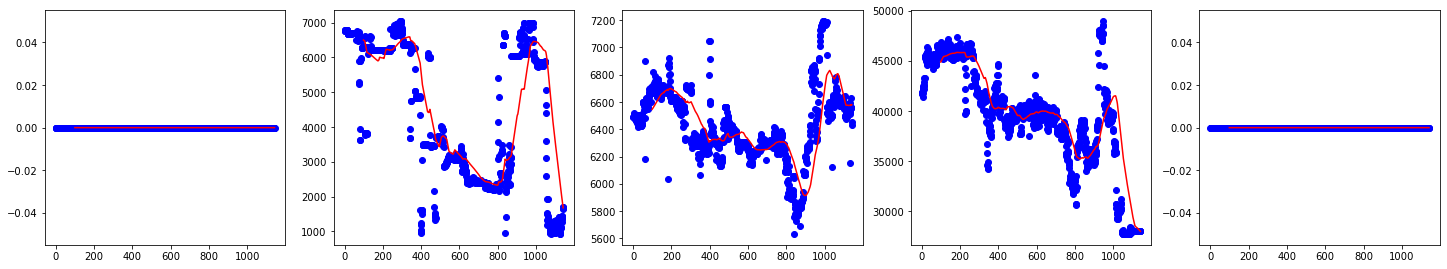

In [9]:
i=1
plt.figure(figsize=(25, 25))
for coloumn in mydata.columns:
    plt.subplot(5, 5, i)
    plt.scatter(range(mydata.shape[0]), mydata[coloumn], color = 'blue')
    plt.plot(mydata[coloumn].rolling(window=100).mean(), color = 'red')
    i+=1

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [11]:
col1=mydata['610FI024D.DACA.PV'].values.reshape(-1,1)
col2=mydata['610FI001.DACA.PV'].values.reshape(-1,1)
col3=mydata['610FI015.DACA.PV'].values.reshape(-1,1)
col4=mydata['610FI023F.PV'].values.reshape(-1,1)
col5=mydata['610FI024C.DACA.PV'].values.reshape(-1,1)

Lineaer model: Y= 4477.9 + 0.0X


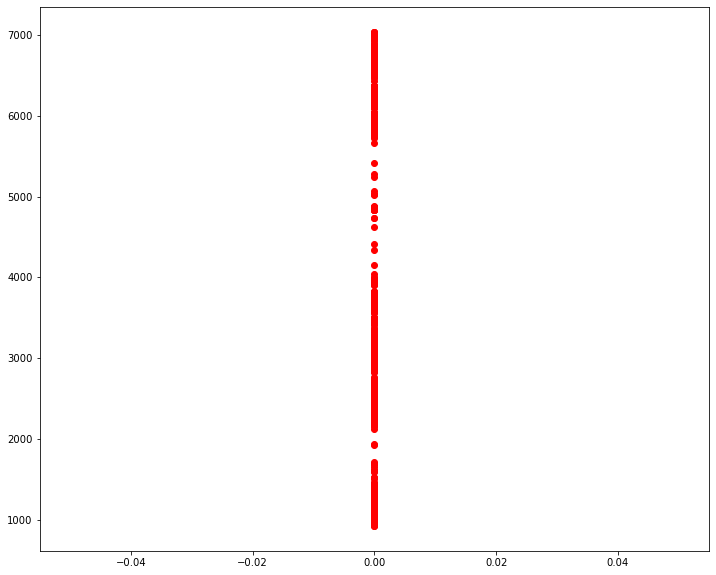

In [12]:
regr=LinearRegression()
regr.fit(col1,col2)
print("Lineaer model: Y= {:.5} + {:.5}X". format(regr.intercept_[0], regr.coef_[0][0]))

preictions= regr.predict(col1)
plt.figure(figsize=(12,10))
plt.scatter(mydata['610FI024D.DACA.PV'], mydata['610FI001.DACA.PV'], c='red')
plt.plot(mydata['610FI024D.DACA.PV'], preictions, c='green', linewidth=3 )
plt.show()

In [13]:
COL1=sm.add_constant(col1)
estim=sm.OLS(col2,COL1)
estim2=estim.fit()
print(estim2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                nan
Time:                        17:11:16   Log-Likelihood:                -10287.
No. Observations:                1143   AIC:                         2.058e+04
Df Residuals:                    1142   BIC:                         2.058e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4477.9396     57.999     77.207      0.0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Cхожий результат будет со всеми остальными столбацими, так как в первом столбце все нулевые значения. С последнийм столбцом, где тоже нулевые значения:

Lineaer model: Y= 0.0 + 0.0X


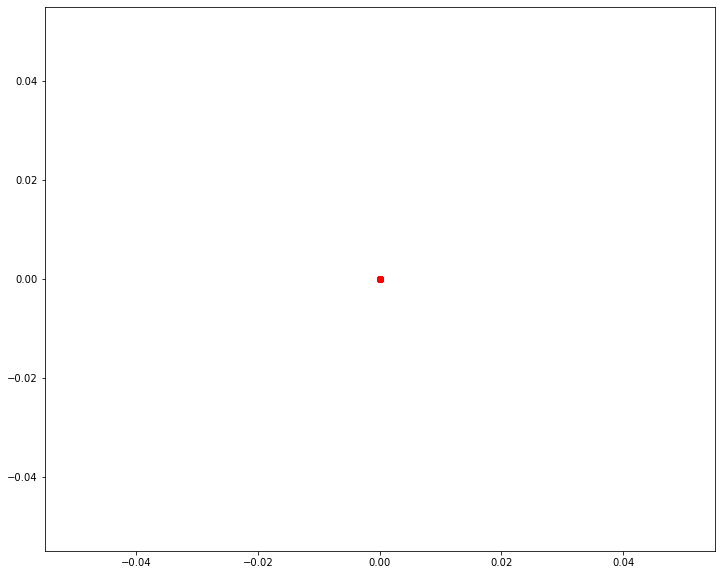

In [14]:
regr=LinearRegression()
regr.fit(col1,col5)
print("Lineaer model: Y= {:.5} + {:.5}X". format(regr.intercept_[0], regr.coef_[0][0]))

preictions= regr.predict(col1)
plt.figure(figsize=(12,10))
plt.scatter(mydata['610FI024D.DACA.PV'], mydata['610FI024C.DACA.PV'], c='red')
plt.plot(mydata['610FI024D.DACA.PV'], preictions, c='green', linewidth=3 )
plt.show()

In [15]:
COL1=sm.add_constant(col1)
estim=sm.OLS(col5,COL1)
estim2=estim.fit()
print(estim2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                nan
Time:                        17:11:16   Log-Likelihood:                    inf
No. Observations:                1143   AIC:                              -inf
Df Residuals:                    1142   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.8/site-packages/sc

Lineaer model: Y= 6221.6 + 0.045331X


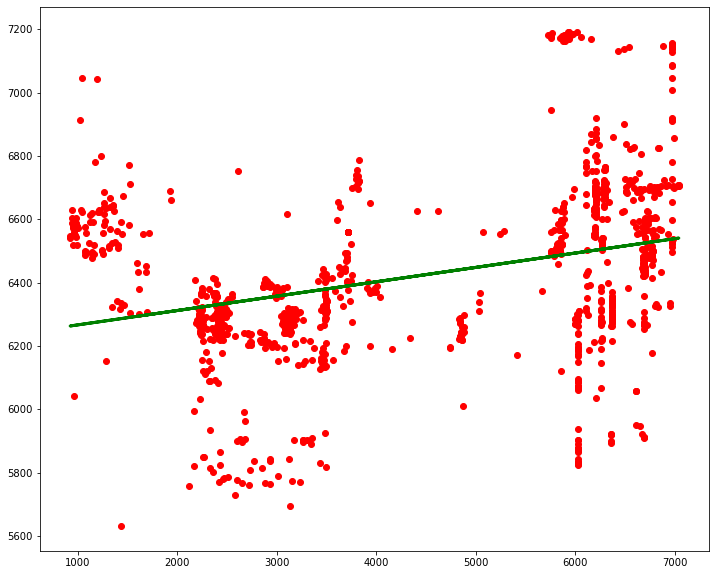

In [16]:
regr=LinearRegression()
regr.fit(col2,col3)
print("Lineaer model: Y= {:.5} + {:.5}X". format(regr.intercept_[0], regr.coef_[0][0]))

preictions= regr.predict(col2)
plt.figure(figsize=(12,10))
plt.scatter(mydata['610FI001.DACA.PV'], mydata['610FI015.DACA.PV'], c='red')
plt.plot(mydata['610FI001.DACA.PV'], preictions, c='green', linewidth=3 )
plt.show()

In [17]:
COL2=sm.add_constant(col2)
estim=sm.OLS(col3,COL2)
estim2=estim.fit()
print(estim2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     139.6
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.82e-30
Time:                        17:11:17   Log-Likelihood:                -7951.2
No. Observations:                1143   AIC:                         1.591e+04
Df Residuals:                    1141   BIC:                         1.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6221.5795     18.756    331.704      0.0

Lineaer model: Y= 3.2263e+04 + 1.588X


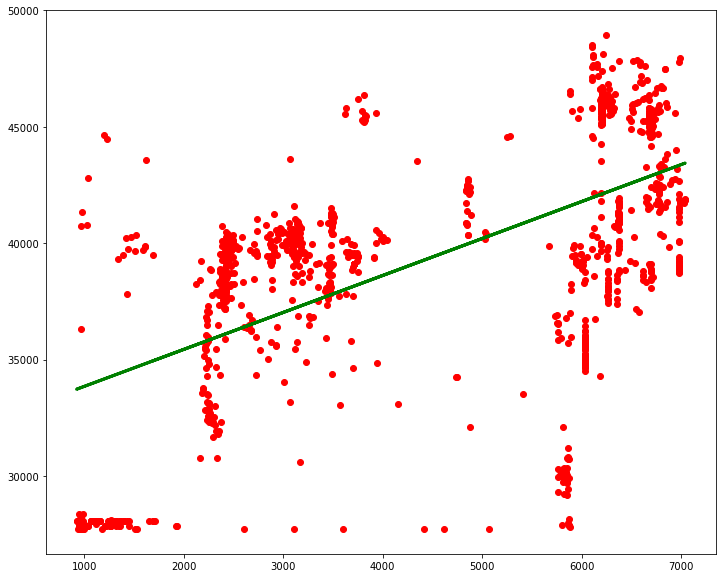

In [18]:
regr=LinearRegression()
regr.fit(col2,col4)
print("Lineaer model: Y= {:.5} + {:.5}X". format(regr.intercept_[0], regr.coef_[0][0]))

preictions= regr.predict(col2)
plt.figure(figsize=(12,10))
plt.scatter(mydata['610FI001.DACA.PV'], mydata['610FI023F.PV'], c='red')
plt.plot(mydata['610FI001.DACA.PV'], preictions, c='green', linewidth=3 )
plt.show()

In [19]:
COL2=sm.add_constant(col2)
estim=sm.OLS(col4,COL2)
estim2=estim.fit()
print(estim2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     605.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):          1.22e-107
Time:                        17:11:17   Log-Likelihood:                -11177.
No. Observations:                1143   AIC:                         2.236e+04
Df Residuals:                    1141   BIC:                         2.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.226e+04    315.379    102.300      0.0

Lineaer model: Y= 9235.3 + 4.6912X


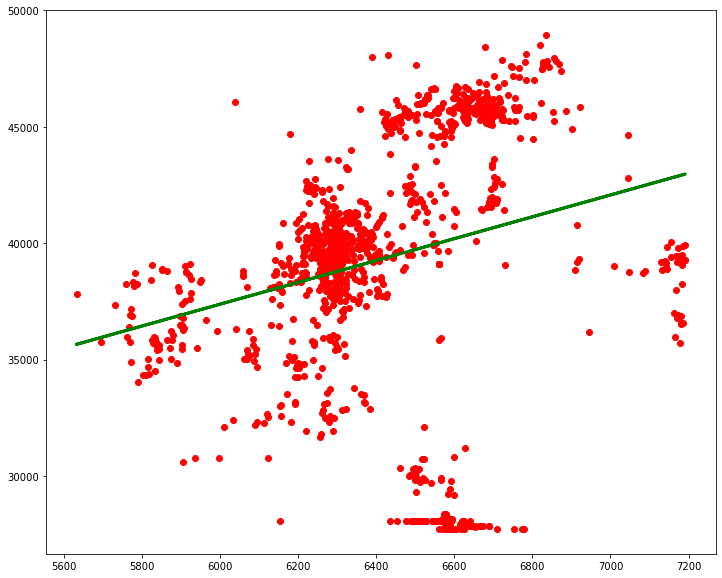

In [20]:
regr=LinearRegression()
regr.fit(col3,col4)
print("Lineaer model: Y= {:.5} + {:.5}X". format(regr.intercept_[0], regr.coef_[0][0]))

preictions= regr.predict(col3)
plt.figure(figsize=(12,10))
plt.scatter(mydata['610FI015.DACA.PV'], mydata['610FI023F.PV'], c='red')
plt.plot(mydata['610FI015.DACA.PV'], preictions, c='green', linewidth=3 )
plt.show()

In [21]:
COL3=sm.add_constant(col3)
estim=sm.OLS(col4,COL3)
estim2=estim.fit()
print(estim2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     69.05
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           2.70e-16
Time:                        17:11:17   Log-Likelihood:                -11387.
No. Observations:                1143   AIC:                         2.278e+04
Df Residuals:                    1141   BIC:                         2.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9235.2658   3630.167      2.544      0.0

Все регрессии оказались очень плохими, есть сильная мультиколлинеарность или другие числовые проблемы. Но лучшая из худших - третья (между 4 и 3 столбцами в моей таблице).

In [22]:
col3=mydata['610FI015.DACA.PV'].values
col4=mydata['610FI023F.PV'].values
regr=LinearRegression()

quadrat=PolynomialFeatures(degree=2)
cubic=PolynomialFeatures(degree=3)

X_quad=quadrat.fit_transform(col3.reshape(-1,1))
X_cub=cubic.fit_transform(col3.reshape(-1,1))
X_fit=np.arange(col3.min(), col3.max(), 1)[:,np.newaxis ]

X_quad

array([[1.00000000e+00, 6.48832032e+03, 4.20983006e+07],
       [1.00000000e+00, 6.49112382e+03, 4.21346884e+07],
       [1.00000000e+00, 6.48665940e+03, 4.20767501e+07],
       ...,
       [1.00000000e+00, 6.55550527e+03, 4.29746493e+07],
       [1.00000000e+00, 6.43429465e+03, 4.14001477e+07],
       [1.00000000e+00, 6.45199237e+03, 4.16282055e+07]])

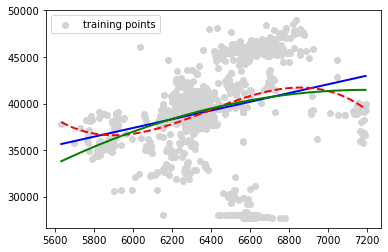

In [23]:
regr=regr.fit(col3.reshape(-1,1),col4)
y_lin_fit=regr.predict(X_fit)
lin_r2_score=r2_score(col4,regr.predict(col3.reshape(-1,1)) )

regr=regr.fit(X_quad,col4)
y_quad_fit=regr.predict(quadrat.fit_transform(X_fit))
lin_r2_score=r2_score(col4,regr.predict(X_quad))

regr=regr.fit(X_cub,col4)
y_cub_fit=regr.predict(cubic.fit_transform(X_fit))
lin_r2_score=r2_score(col4,regr.predict(X_cub))

plt.scatter(col3, col4, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,color='blue', lw=2, linestyle='-')
plt.plot(X_fit, y_cub_fit,color='red', lw=2, linestyle='--')
plt.plot(X_fit, y_quad_fit,color='green', lw=2)
plt.legend()